Restaurant Rating prediction Svetlana Andriianova

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
26458,id_1895,Budapest,NaN,1896.0,NaN,2.0,[['Enjoyed a great coffee in the bustling cit....,/Restaurant_Review-g274887-d6783592-Reviews-Bu...,d6783592,1,4.0
30226,id_1511,Vienna,NaN,1512.0,NaN,41.0,"[['Average place', 'Lot of selection for food'...",/Restaurant_Review-g190454-d1319636-Reviews-Ga...,d1319636,1,3.5
49239,id_4679,Milan,NaN,4682.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187849-d8339963-Reviews-Ba...,d8339963,1,4.0
254,id_254,Lisbon,"['Portuguese', 'Vegetarian Friendly']",689.0,$,83.0,"[[""I'll return to make sure it's true!"", 'Outs...",/Restaurant_Review-g189158-d7364830-Reviews-Ch...,d7364830,0,0.0
37220,id_3062,Milan,NaN,3064.0,NaN,17.0,"[[], []]",/Restaurant_Review-g187849-d12718522-Reviews-I...,d12718522,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data['city_count'] = data['City']
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.city_count.value_counts()
data_cities = {'London': 5757, 'Paris': 4897, 'Madrid': 3108, 'Barcelona': 2734, 'Berlin':2155, 'Milan': 2133, 'Rome':2078, 'Prague':1443,
       'Lisbon': 1300, 'Vienna':1166, 'Amsterdam':1086, 'Brussels':1060, 'Hamburg':949, 'Munich':893, 'Lyon':892,
        'Stockholm':820, 'Budapest':816, 'Warsaw':727, 'Dublin':673,
       'Copenhagen':659, 'Athens':628, 'Edinburgh':596, 'Zurich':538, 'Oporto':513, 'Geneva':481,
       'Krakow':443, 'Oslo':385, 'Helsinki':376, 'Bratislava':301, 'Luxembourg':210, 'Ljubljana':183 }
data.city_count = data.city_count.replace(to_replace=data_cities)
data['ranking_st']=data['Ranking']/data['city_count']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
Restaurant_id              50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                32639 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
city_count                 50000 non-null int64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest  

In [21]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ranking_st
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,2.647131
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0.281915
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,1.359060
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0.289908
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0.122924


In [22]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ranking_st
2013,id_2013,"['Italian', 'French', 'Fast Food']",11328.0,$,7.0,"[[], []]",/Restaurant_Review-g187147-d7983593-Reviews-No...,d7983593,0,0.0,...,0,1,0,0,0,0,0,0,0,2.313253
1118,id_1118,"['Bar', 'Cafe', 'Spanish', 'Mediterranean', 'E...",2006.0,$$ - $$$,178.0,"[['Nice cafeteria.', 'Casual Dining and Very E...",/Restaurant_Review-g187497-d1113725-Reviews-Gl...,d1113725,0,0.0,...,0,0,0,0,0,0,0,0,0,0.733723
20344,id_11857,"['Italian', 'Pizza']",11859.0,$$ - $$$,7.0,"[['best coffee in town', 'Best pizza ever!'], ...",/Restaurant_Review-g187147-d2623241-Reviews-La...,d2623241,1,4.0,...,0,1,0,0,0,0,0,0,0,2.421687
15212,id_133,"['Mediterranean', 'Spanish', 'Vegetarian Frien...",134.0,$,454.0,"[['Best Oreja de Cerdo in Madrid', 'Authentic ...",/Restaurant_Review-g187514-d1907082-Reviews-Ca...,d1907082,1,4.5,...,0,0,0,0,0,0,0,0,0,0.043115
20491,id_948,"['Indian', 'Asian', 'Balti']",949.0,$$ - $$$,118.0,"[['Enjoyable curry', 'Fantastic lunch!'], ['12...",/Restaurant_Review-g186525-d1754545-Reviews-Mo...,d1754545,1,4.0,...,0,0,0,0,0,0,0,0,0,1.592282


#### Возьмем следующий признак "Price Range".

In [23]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [24]:
# Добавим столбец Price_Range_isNaN
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [25]:
data['Price Range'].fillna('$$ - $$$', inplace=True)
data['Price Range'].replace('$$$$',3, inplace=True)
data['Price Range'].replace('$$ - $$$',2, inplace=True)
data['Price Range'].replace('$',1, inplace=True)
data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [26]:
data['Cuisine Style'].fillna("['Regional']", inplace=True)
data['Cuisine Style'] = data['Cuisine Style'].str.split(',').tolist()
data['Cuisine_Number'] = data['Cuisine Style'].apply(lambda x: len(x))

In [27]:
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
Restaurant_id              50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null int64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
city_count                 50000 non-null int64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest    

In [29]:
Data=data.drop(['Restaurant_id', 'Cuisine Style', 'Reviews', 'URL_TA'],axis=1)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

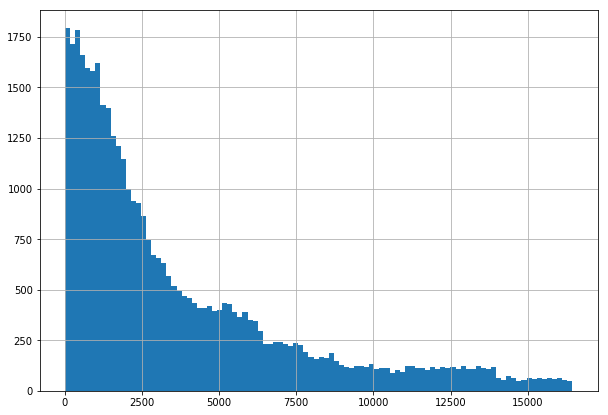

In [30]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

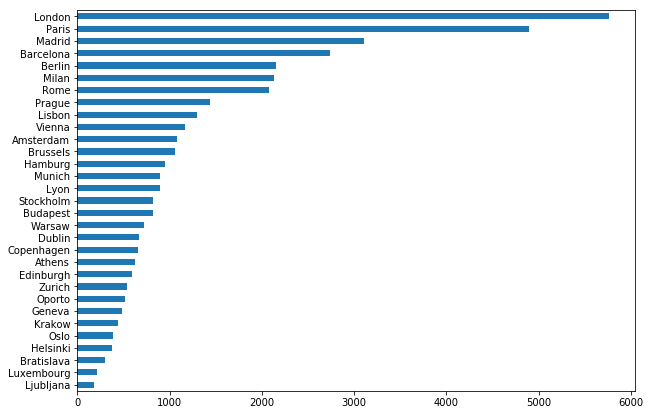

In [31]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

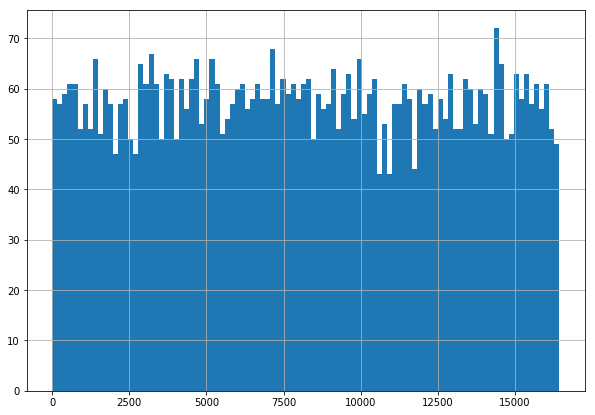

In [32]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

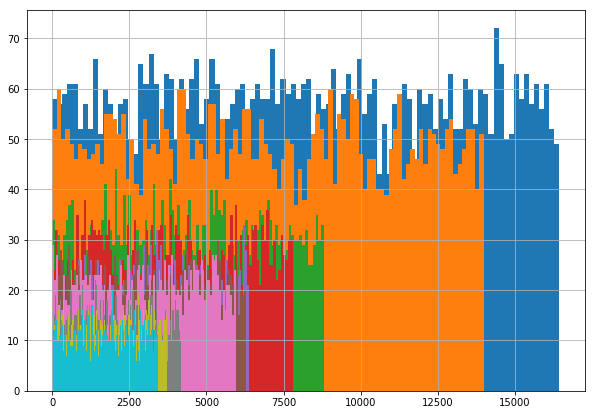

In [33]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

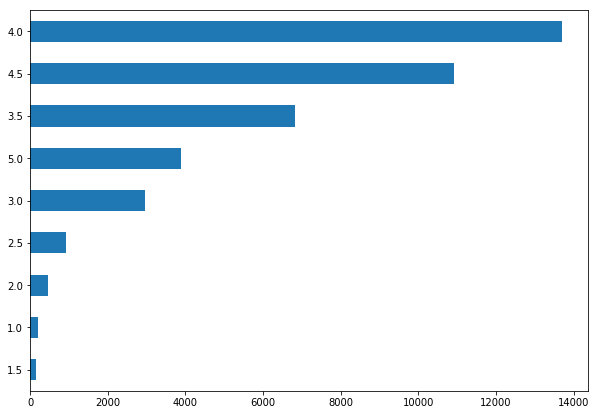

In [34]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

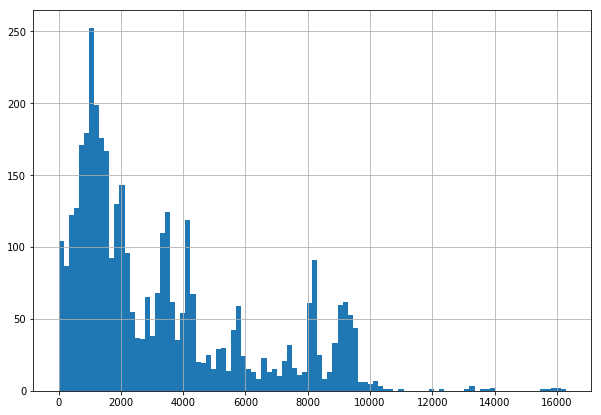

In [35]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

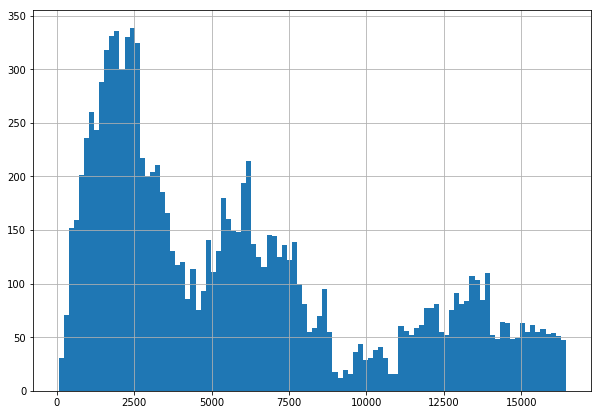

In [36]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

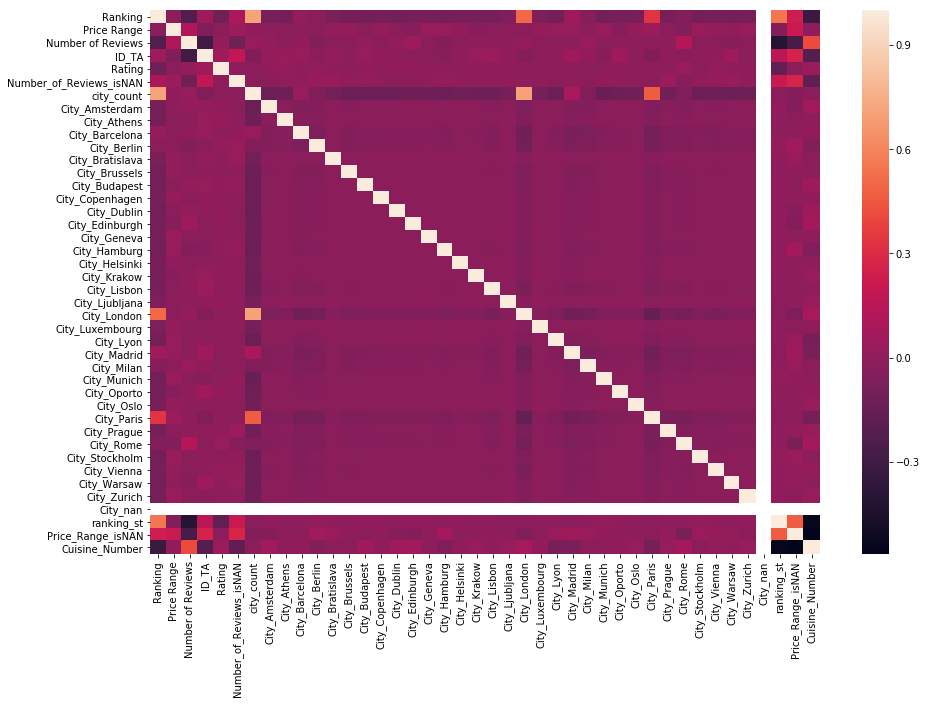

In [37]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [38]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [39]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Price_Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Price Range'].fillna('$$ - $$$', inplace=True)
    df_output['Price Range'].replace('$$$$',3, inplace=True)
    df_output['Price Range'].replace('$$ - $$$',2, inplace=True)
    df_output['Price Range'].replace('$',1, inplace=True)
    df_output['city_count'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=['City'], dummy_na=True)
    data_cities = {'London': 5757, 'Paris': 4897, 'Madrid': 3108, 'Barcelona': 2734, 'Berlin':2155, 'Milan': 2133, 'Rome':2078, 'Prague':1443,
       'Lisbon': 1300, 'Vienna':1166, 'Amsterdam':1086, 'Brussels':1060, 'Hamburg':949, 'Munich':893, 'Lyon':892,
        'Stockholm':820, 'Budapest':816, 'Warsaw':727, 'Dublin':673,
       'Copenhagen':659, 'Athens':628, 'Edinburgh':596, 'Zurich':538, 'Oporto':513, 'Geneva':481,
       'Krakow':443, 'Oslo':385, 'Helsinki':376, 'Bratislava':301, 'Luxembourg':210, 'Ljubljana':183 }
    df_output.city_count = df_output.city_count.replace(to_replace=data_cities)
    df_output['ranking_st']= df_output['Ranking']/df_output['city_count']
    df_output['Cuisine Style'].fillna("['Regional']", inplace=True)
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.split(',').tolist()
    df_output['Cuisine_Number'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    df_output['ID_TA'] = df_output['ID_TA'].apply(lambda x: int(x[1:]))
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    #df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [40]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,city_count,City_Amsterdam,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ranking_st,Cuisine_Number
44050,2123.0,1,0.0,13457625,1,5.0,1,0,1300,0,...,0,0,0,0,0,0,0,0,1.633077,6
39046,4251.0,2,7.0,9784271,1,4.0,0,1,2155,0,...,0,0,0,0,0,0,0,0,1.972622,1
30216,3267.0,2,0.0,10025976,1,5.0,1,1,2155,0,...,0,0,0,0,0,0,0,0,1.516009,1
8317,24.0,1,253.0,1912572,0,0.0,0,0,1060,0,...,0,0,0,0,0,0,0,0,0.022642,6
20369,1027.0,2,57.0,12713187,1,4.5,0,0,2734,0,...,0,0,0,0,0,0,0,0,0.375640,5
46674,3506.0,2,3.0,7123941,1,3.5,0,0,1443,0,...,0,1,0,0,0,0,0,0,2.429660,1
32351,13412.0,2,31.0,730406,1,3.5,0,0,5757,0,...,0,0,0,0,0,0,0,0,2.329686,1
7899,1002.0,1,25.0,4802533,0,0.0,0,0,816,0,...,0,0,0,0,0,0,0,0,1.227941,2
33610,4118.0,2,0.0,7993666,1,5.0,1,1,3108,0,...,0,0,0,0,0,0,0,0,1.324968,1
45359,402.0,2,357.0,1674446,1,4.0,0,0,892,0,...,0,0,0,0,0,0,0,0,0.450673,2


In [41]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
ID_TA                      50000 non-null int64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price_Range_isNAN          50000 non-null uint8
city_count                 50000 non-null int64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest              50000 non-null uint8
City_Copenhagen            50000 non-null uint8
City_Dublin                50000 non-null uint8
City_Edinburgh       

In [42]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [43]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [44]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 42), (40000, 42), (40000, 41), (32000, 41), (8000, 41))

# Model 
Сам ML

In [45]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [46]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [47]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [48]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20271749999999997


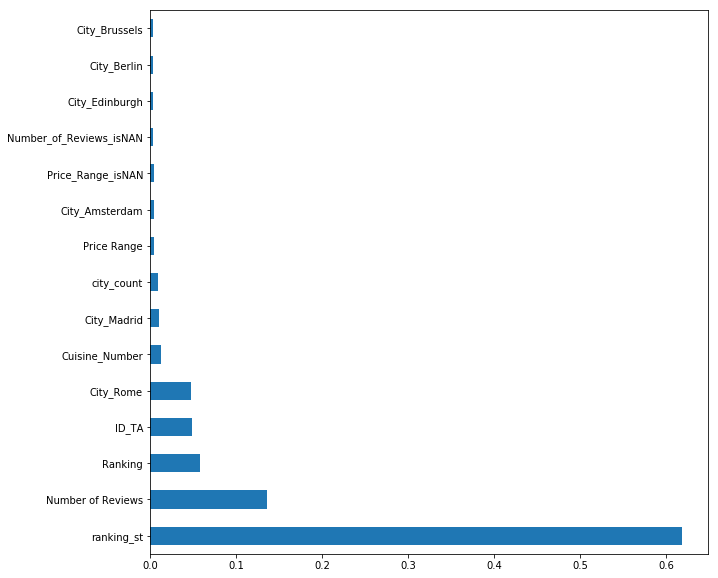

In [49]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [50]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,ID_TA,Rating,Number_of_Reviews_isNAN,Price_Range_isNAN,city_count,City_Amsterdam,City_Athens,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,ranking_st,Cuisine_Number
9433,2832.0,2,2.0,12430625,0.0,0,1,2155,0,0,...,0,0,0,0,0,0,0,0,1.314153,1
1300,8365.0,2,0.0,8436649,0.0,1,1,4897,0,0,...,1,0,0,0,0,0,0,0,1.708189,1
9795,5579.0,2,63.0,6704214,0.0,0,0,3108,0,0,...,0,0,0,0,0,0,0,0,1.795045,1
9479,2592.0,2,15.0,4769003,0.0,0,0,1443,0,0,...,0,1,0,0,0,0,0,0,1.796258,2
1376,6060.0,2,9.0,4872305,0.0,0,0,3108,0,0,...,0,0,0,0,0,0,0,0,1.949807,3
7974,2162.0,2,3.0,9562053,0.0,0,1,893,0,0,...,0,0,0,0,0,0,0,0,2.421053,1
419,2772.0,2,0.0,12811941,0.0,1,1,1086,1,0,...,0,0,0,0,0,0,0,0,2.552486,1
5306,2446.0,2,5.0,11882892,0.0,0,1,949,0,0,...,0,0,0,0,0,0,0,0,2.577450,2
607,2443.0,2,4.0,5507530,0.0,0,1,949,0,0,...,0,0,0,0,0,0,0,0,2.574289,1
919,209.0,2,36.0,8765247,0.0,0,1,949,0,0,...,0,0,0,0,0,0,0,0,0.220232,1


In [51]:
test_data = test_data.drop(['Rating'], axis=1)

In [52]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [53]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
predict_submission

array([3.22 , 4.19 , 4.235, ..., 3.025, 4.49 , 4.185])

In [55]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.220
1,id_1,4.190
2,id_2,4.235
3,id_3,4.385
4,id_4,4.470
5,id_5,4.530
6,id_6,2.515
7,id_7,2.485
8,id_8,4.055
9,id_9,4.610


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
